In [ ]:
import pandas as pd #for data preprocessing and cleaning
import numpy as np # for numerical calculations

import matplotlib.pyplot as plt #Data visualization and plotting
import seaborn as sns   # Data visualization and plotting




In [ ]:
df=pd.read_csv('/content/sample_data/kidney_disease.csv')

In [ ]:
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


## **Data Pre Processing**

In [ ]:
df=df.drop("id",axis=1)

In [ ]:
print(df.describe())

              age          bp          sg          al          su         bgr  \
count  391.000000  388.000000  353.000000  354.000000  351.000000  356.000000   
mean    51.483376   76.469072    1.017408    1.016949    0.450142  148.036517   
std     17.169714   13.683637    0.005717    1.352679    1.099191   79.281714   
min      2.000000   50.000000    1.005000    0.000000    0.000000   22.000000   
25%     42.000000   70.000000    1.010000    0.000000    0.000000   99.000000   
50%     55.000000   80.000000    1.020000    0.000000    0.000000  121.000000   
75%     64.500000   80.000000    1.020000    2.000000    0.000000  163.000000   
max     90.000000  180.000000    1.025000    5.000000    5.000000  490.000000   

               bu          sc         sod         pot        hemo  
count  381.000000  383.000000  313.000000  312.000000  348.000000  
mean    57.425722    3.072454  137.528754    4.627244   12.526437  
std     50.503006    5.741126   10.408752    3.193904    2.912587 

In [ ]:
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [ ]:
df.isnull().sum()

age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [ ]:
data_point=df.shape[0]
print(data_point)

400


In [ ]:
#Handling null values with mode

from sklearn.impute import SimpleImputer

impute_mean=SimpleImputer(missing_values=np.nan, strategy='most_frequent')

df_imputed=pd.DataFrame(impute_mean.fit_transform(df))
df_imputed.columns=df.columns

df_imputed


,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.02,1.0,0.0,normal,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.02,4.0,0.0,normal,normal,notpresent,notpresent,99.0,...,38,6000,5.2,no,no,no,good,no,no,ckd
2,62.0,80.0,1.01,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,5.2,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.01,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.02,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.02,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [ ]:
df_imputed.isnull().sum()

age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

**Finding Unique values to handle special null values(?!\t).**

In [ ]:
df_imputed['age'].unique

<bound method Series.unique of 0      48.0
1       7.0
2      62.0
3      48.0
4      51.0
       ... 
395    55.0
396    42.0
397    12.0
398    17.0
399    58.0
Name: age, Length: 400, dtype: object>

In [ ]:
for i in df_imputed.columns:  #Looping through unique value in every column
  print("----------------",i,"------------------\n")
  print(set(df_imputed[i].tolist()),"\n")


---------------- age ------------------

{2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 11.0, 12.0, 14.0, 15.0, 17.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 90.0} 

---------------- bp ------------------

{100.0, 70.0, 140.0, 110.0, 80.0, 50.0, 180.0, 120.0, 90.0, 60.0} 

---------------- sg ------------------

{1.02, 1.025, 1.005, 1.015, 1.01} 

---------------- al ------------------

{0.0, 1.0, 2.0, 3.0, 4.0, 5.0} 

---------------- su ------------------

{0.0, 1.0, 2.0, 3.0, 4.0, 5.0} 

---------------- rbc ------------------

{'normal', 'abnormal'} 

---------------- pc ------------------

{'normal', 'abnormal'} 

---------------- pcc ------------------

{'pre

In [ ]:
df_imputed['classification']=df_imputed['classification'].apply(lambda x: 'ckd' if x=='ckd\t' else x)

In [ ]:
df_imputed['classification'].unique()

In [ ]:
df_imputed['cad']=df_imputed['cad'].apply(lambda x: 'no' if x=='\tno' else x)

In [ ]:
df_imputed['cad'].unique()

array(['no', 'yes'], dtype=object)

In [ ]:
df_imputed['dm'] = df_imputed['dm'].apply(lambda x: 'no' if x == '\tno' else 'yes' if x == '\tyes' else x)


In [ ]:

df_imputed['pcv'] = pd.to_numeric(df_imputed['pcv'], errors='coerce')
df_imputed['wc'] = pd.to_numeric(df_imputed['wc'], errors='coerce')
df_imputed['rc'] = pd.to_numeric(df_imputed['rc'], errors='coerce')


In [ ]:
df_imputed['pcv'] = df_imputed['pcv'].astype(float)
df_imputed['wc'] = df_imputed['wc'].astype(float)
df_imputed['rc'] =df_imputed['rc'].astype(float)


In [ ]:
df_imputed['pcv'].fillna(df_imputed['pcv'].mean(), inplace=True)
df_imputed['wc'].fillna(df_imputed['wc'].mean(), inplace=True)
df_imputed['rc'].fillna(df_imputed['rc'].mean(), inplace=True)


In [ ]:
print(df_imputed['pcv'].unique())
print(df_imputed['wc'].unique())
print(df_imputed['rc'].unique())


[44.        38.        31.        32.        35.        39.
 36.        33.        29.        28.        41.        16.
 24.        37.        30.        34.        40.        45.
 27.        48.        39.2556391 52.        14.        22.
 18.        42.        17.        46.        23.        19.
 25.        26.        15.        21.        43.        20.
 47.         9.        49.        50.        53.        51.
 54.       ]
[ 7800.          6000.          7500.          6700.
  7300.          9800.          6900.          9600.
 12100.          4500.         12200.         11000.
  3800.         11400.          5300.          9200.
  6200.          8300.          8400.         10300.
  9100.          7900.          6400.          8600.
 18900.         21600.          4300.          8500.
 11300.          7200.          7700.         14600.
  6300.          7100.         11800.          9400.
  5500.          5800.         13200.         12500.
  5600.          7000.         11900.

In [ ]:
print(df_imputed['dm'].unique())


['yes' 'no']


Text(0.5, 1.0, 'countplot')

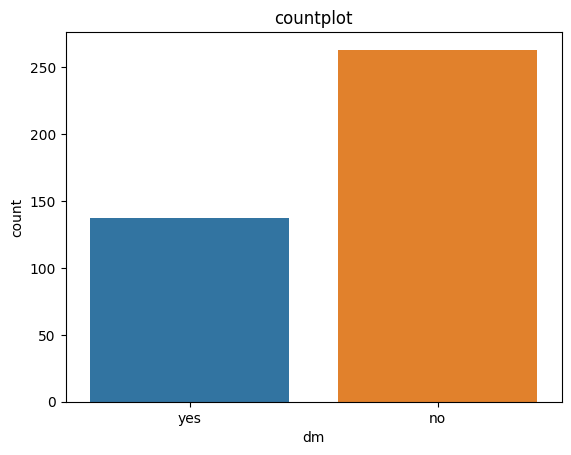

In [ ]:
sns.countplot(x='dm', data=df_imputed)
plt.title("countplot")


In [ ]:
for i in df.select_dtypes(exclude=['object']).columns:
  df_imputed[i]=df_imputed[i].apply(lambda x: float(x))

In [ ]:
df_imputed.dtypes

age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [ ]:
# List of object columns to convert
object_columns = ['rbc', 'pc', 'pcc', 'ba', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'classification']
# Convert yes/no values to 1/0
yes_no_columns = ['dm', 'cad', 'pe', 'ane']
for i in yes_no_columns:
  df_imputed[i] = df_imputed[i].apply(lambda x: 1 if x=='yes' else 0)



In [ ]:
ckd_notckd_column=['classification']
for i in ckd_notckd_column:
  df_imputed[i] = df_imputed[i].apply(lambda x: 1 if x=='ckd' else 0)

In [ ]:
nor_abnor_column=['rbc','pc']
for i in nor_abnor_column:
  df_imputed[i]=df_imputed[i].apply(lambda x: 1 if x=='abnormal' else 0 )

In [ ]:
present_notPresent_column=['pcc','ba']
for i in present_notPresent_column:
  df_imputed[i]=df_imputed[i].apply(lambda x: 1 if x=='present' else 0 )

In [ ]:
apptite_column=['appet']
for i in apptite_column:
  df_imputed[i]=df_imputed[i].apply(lambda x: 1 if x=='good' else 0)

In [ ]:
hypertension_column=['htn']
for i in hypertension_column:
  df_imputed[i]=df_imputed[i].apply(lambda x: 1 if x=='yes' else 0)

In [ ]:
df_imputed

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,0,0,0,0,121.0,...,44,7800,5.2,1,1,0,1,0,0,1
1,7.0,50.0,1.020,4.0,0.0,0,0,0,0,99.0,...,38,6000,5.2,0,0,0,1,0,0,1
2,62.0,80.0,1.010,2.0,3.0,0,0,0,0,423.0,...,31,7500,5.2,0,1,0,0,0,1,1
3,48.0,70.0,1.005,4.0,0.0,0,0,1,0,117.0,...,32,6700,3.9,1,0,0,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,0,0,0,0,106.0,...,35,7300,4.6,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,0,0,0,0,140.0,...,47,6700,4.9,0,0,0,1,0,0,0
396,42.0,70.0,1.025,0.0,0.0,0,0,0,0,75.0,...,54,7800,6.2,0,0,0,1,0,0,0
397,12.0,80.0,1.020,0.0,0.0,0,0,0,0,100.0,...,49,6600,5.4,0,0,0,1,0,0,0
398,17.0,60.0,1.025,0.0,0.0,0,0,0,0,114.0,...,51,7200,5.9,0,0,0,1,0,0,0


In [ ]:
df_imputed.replace('\t?', np.nan, inplace=True)

In [ ]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             400 non-null    float64
 1   bp              400 non-null    float64
 2   sg              400 non-null    float64
 3   al              400 non-null    float64
 4   su              400 non-null    float64
 5   rbc             400 non-null    int64  
 6   pc              400 non-null    int64  
 7   pcc             400 non-null    int64  
 8   ba              400 non-null    int64  
 9   bgr             400 non-null    float64
 10  bu              400 non-null    float64
 11  sc              400 non-null    float64
 12  sod             400 non-null    float64
 13  pot             400 non-null    float64
 14  hemo            400 non-null    float64
 15  pcv             400 non-null    float64
 16  wc              400 non-null    float64
 17  rc              400 non-null    flo

In [ ]:
'''
from sklearn.preprocessing import LabelEncoder
import numpy as np
for i in df.columns:
  if df[i].dtype==np.number:
    continue
  df[i]=LabelEncoder().fit_transform(df[i])

'''

**Fixing Imbalance Dataset**

In [ ]:
#splitting the datase into X and Y variable
x=df_imputed.drop(['classification'],axis=1)
y=df_imputed['classification']

In [ ]:
print(type(x))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
#looking at the imbalanced dataset
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

print(Counter(y))

Counter({1: 250, 0: 150})


In [ ]:

'''#Balancing the dataset
balanced=RandomOverSampler()

x_balance,y_balance=balanced.fit_resample(x,y)
print(Counter(y))
'''

**Feature Scaling using MinMax Scaler**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler((-1,1))
x_scaled=scaler.fit_transform(x)
#x_columns=x.columns
#x[x_columns]=x_scaled.transform(x)

print(x.shape)


(400, 24)


In [ ]:
#Applying PCA- Dimentionality reduction

In [ ]:
import numpy as np
import pandas as pd

# Check if x_scaled is a numpy array
if isinstance(x_scaled, np.ndarray):
    print("x_scaled is a numpy array")
    print("Shape:", x_scaled.shape)
    print("Sample data:\n", x_scaled[:5])  # Print the first 5 rows

# Check if x_scaled is a pandas DataFrame
elif isinstance(x_scaled, pd.DataFrame):
    print("x_scaled is a pandas DataFrame")
    print("Shape:", x_scaled.shape)
    print("Sample data:\n", x_scaled.head())  # Print the first few rows

# If x_scaled is not a numpy array or pandas DataFrame
else:
    print("x_scaled is neither a numpy array nor a pandas DataFrame")


x_scaled is a numpy array
Shape: (400, 24)
Sample data:
 [[ 0.04545455 -0.53846154  0.5        -0.6        -1.         -1.
  -1.         -1.         -1.         -0.57692308 -0.82284981 -0.97883598
   0.6466877  -0.95505618  0.67346939  0.55555556 -0.53719008  0.05084746
   1.          1.         -1.          1.         -1.         -1.        ]
 [-0.88636364 -1.          0.5         0.6        -1.         -1.
  -1.         -1.         -1.         -0.67094017 -0.91527599 -0.98941799
   0.6466877  -0.95505618  0.11564626  0.28888889 -0.68595041  0.05084746
  -1.         -1.         -1.          1.         -1.         -1.        ]
 [ 0.36363636 -0.53846154 -0.5        -0.2         0.2        -1.
  -1.         -1.         -1.          0.71367521 -0.73555841 -0.96296296
   0.6466877  -0.95505618 -0.11564626 -0.02222222 -0.56198347  0.05084746
  -1.          1.         -1.         -1.         -1.          1.        ]
 [ 0.04545455 -0.69230769 -1.          0.6        -1.         -1.
  -1.     

**Splitting dataset into Training and Testing set**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(x_scaled, y, test_size=0.2,random_state=42)



**EDA-Exploratory Data Analysis**

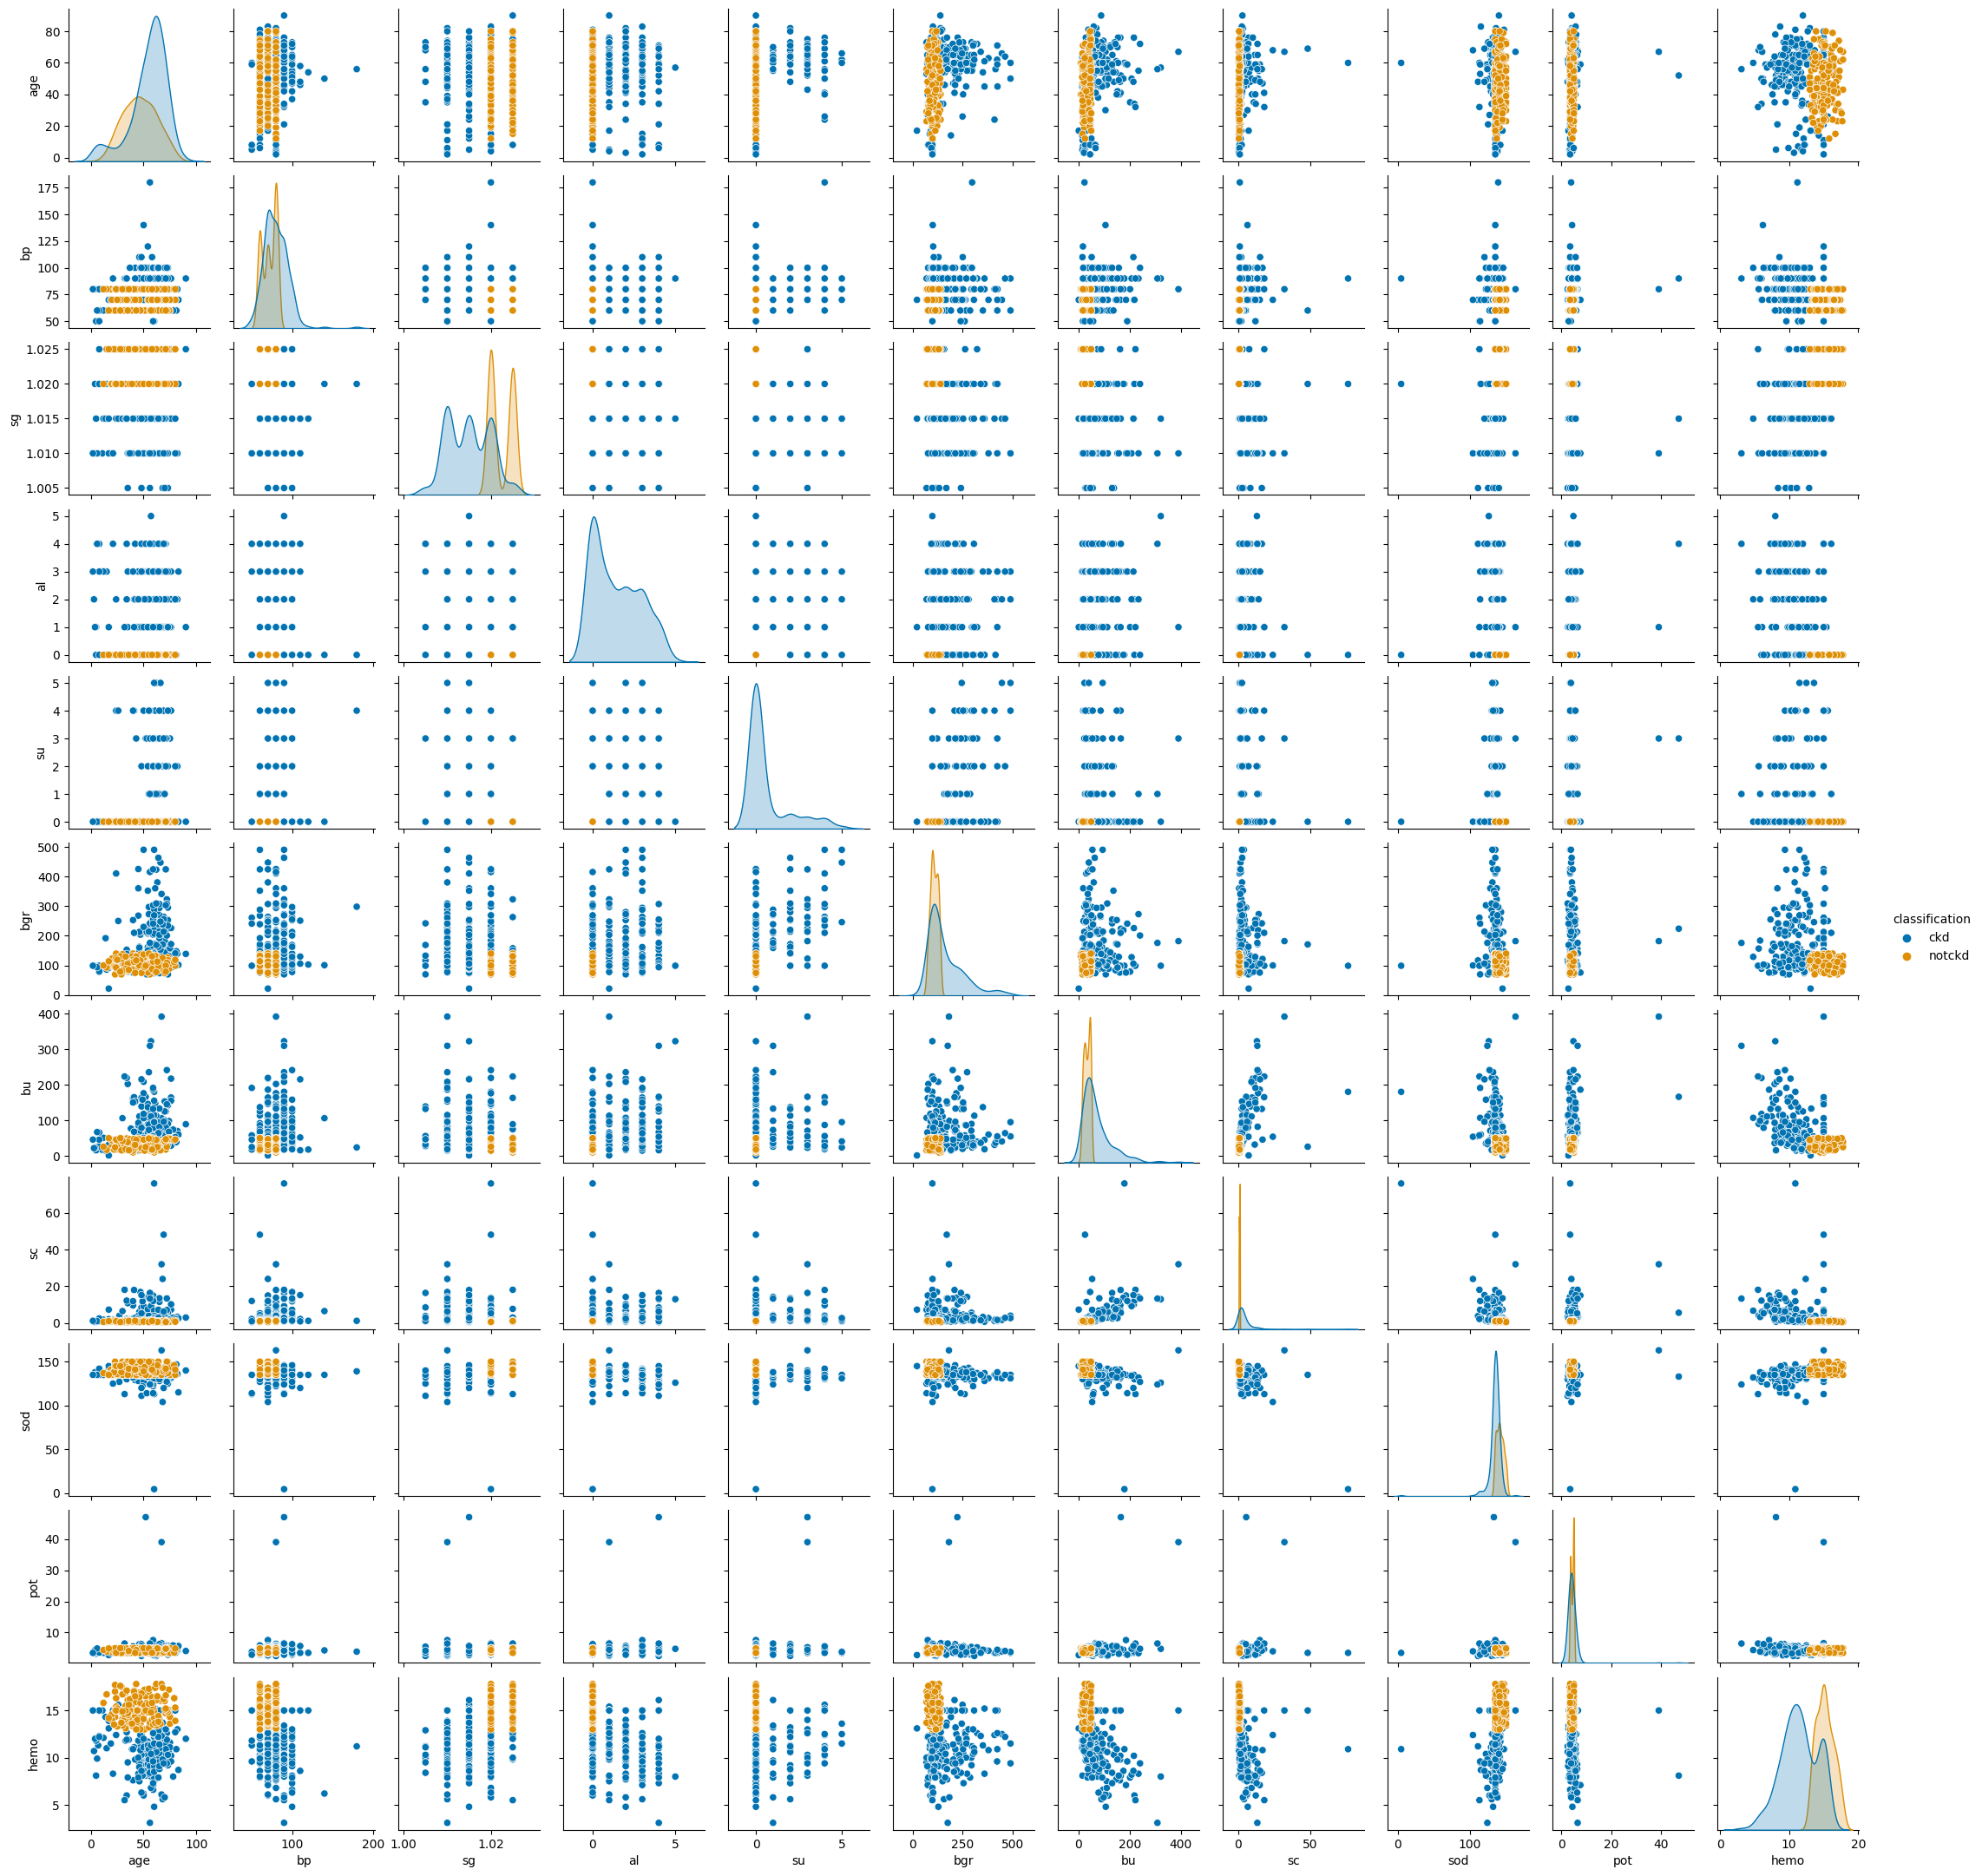

In [ ]:
sns.pairplot(data=df_imputed, hue="classification", height = 2, palette = 'colorblind');


<ipython-input-114-f3e49845b041>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: title={'center': 'Correlation Matrix Heatmap'}>

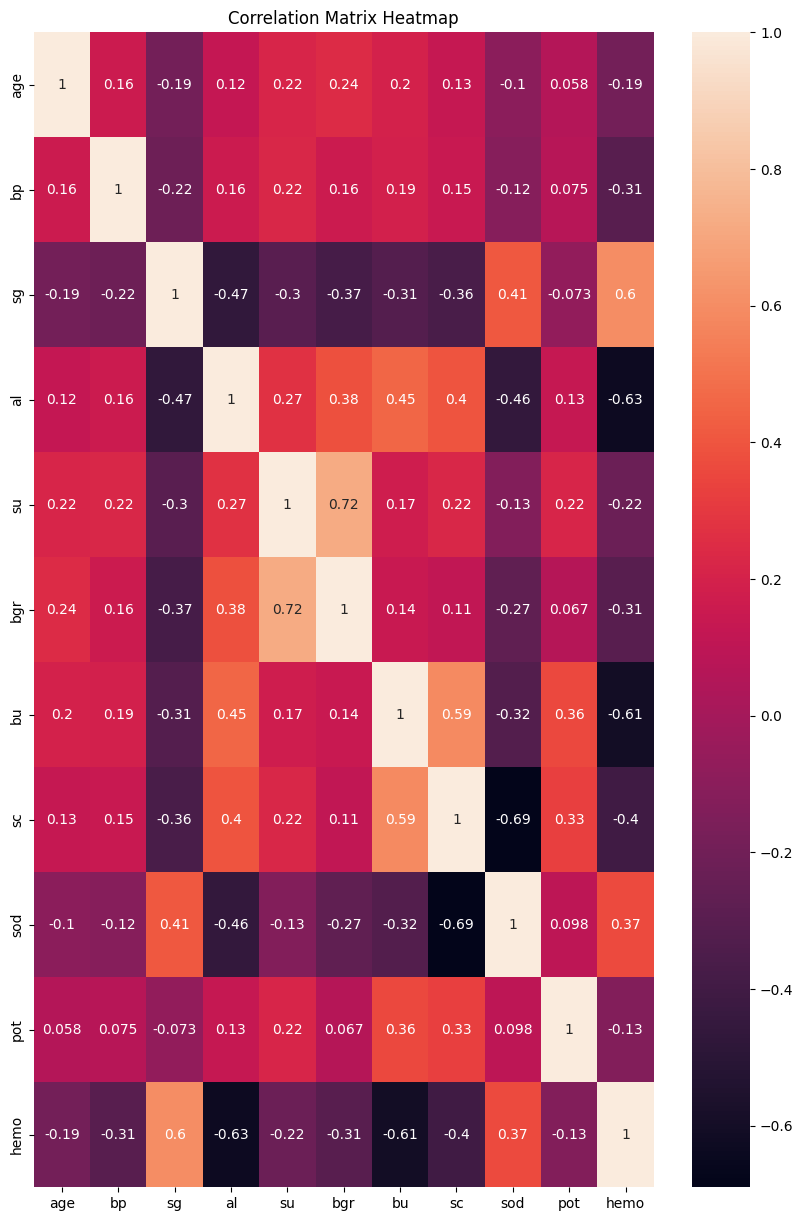

In [ ]:
#data = sns.load_dataset("df")
#data = data.pivot("age", "bp", "sg","al")
plt.figure(figsize=(10,15))

plt.title("Correlation Matrix Heatmap")

sns.heatmap(df.corr(),annot=True)



Text(0.5, 1.0, 'countplot')

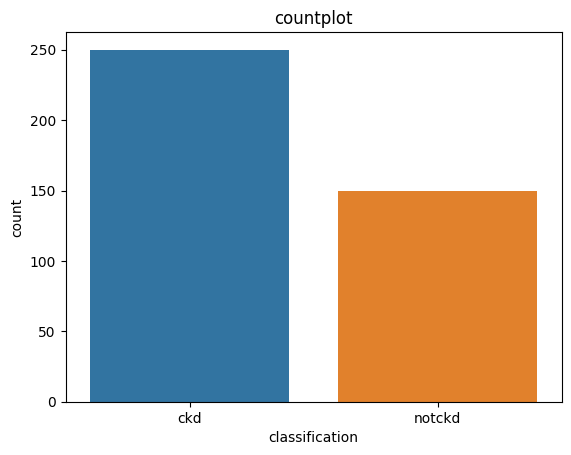

In [ ]:
sns.countplot(x='classification', data=df_imputed)
plt.title("countplot")


# **Model Training and Evaluation**

**Using  SVM model**

In [ ]:
from sklearn import svm
from sklearn import metrics

model_svm=svm.SVC()
model_svm.fit(X_train,y_train)

y_prediction_svm=model_svm.predict(X_test)

score_svm = metrics.accuracy_score(y_prediction_svm, y_test).round(4)
print("----------------------------------")
print('The accuracy of the SVM is: {}'.format(score_svm))
print("----------------------------------")
# save the accuracy score
score = set()
score.add(('SVM', score_svm))


----------------------------------
The accuracy of the SVM is: 0.9875
----------------------------------


**Using Logistic Regression.**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Creating the Logistic Regression model
model_lr = LogisticRegression()

# Fiting the model on the training data
model_lr.fit(X_train, y_train)

# Making predictions on the test data
y_pred_lr = model_lr.predict(X_test)

# Calculating accuracy scores
train_score_lr = model_lr.score(X_train, y_train)
test_score_lr = model_lr.score(X_test, y_test)

print("----------------------------------")
print('Training accuracy of Logistic Regression: {:.2%}'.format(train_score_lr))
print('Testing accuracy of Logistic Regression: {:.2%}'.format(test_score_lr))
print("----------------------------------")


----------------------------------
Training accuracy of Logistic Regression: 99.38%
Testing accuracy of Logistic Regression: 98.75%
----------------------------------


In [ ]:
from sklearn.metrics import classification_report

# Generate classification report for SVM model
report_svm = classification_report(y_test, y_prediction_svm)
print("Classification Report for SVM:\n", report_svm)

# Generate classification report for Logistic Regression model
report_lr = classification_report(y_test, y_pred_lr)
print("Classification Report for Logistic Regression:\n", report_lr)


Classification Report for SVM:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        28
           1       1.00      0.98      0.99        52

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80

Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        28
           1       1.00      0.98      0.99        52

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



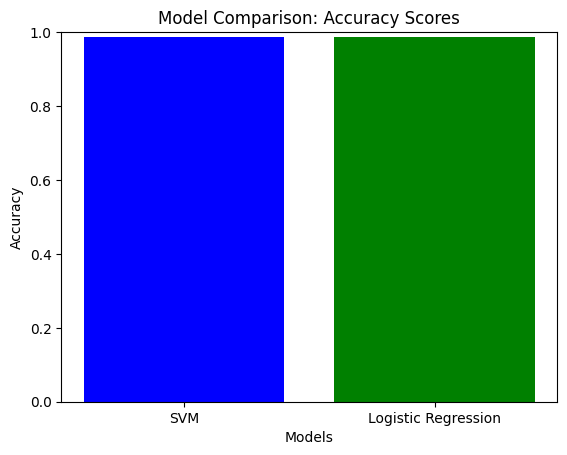

In [ ]:
import matplotlib.pyplot as plt

# Data for plotting
models = ['SVM', 'Logistic Regression']
accuracy_scores = [score_svm, test_score_lr]

# Create a bar plot
plt.bar(models, accuracy_scores, color=['blue', 'green'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Comparison: Accuracy Scores')
plt.ylim(0, 1)  # Set y-axis limit to match accuracy range (0-1)
plt.show()


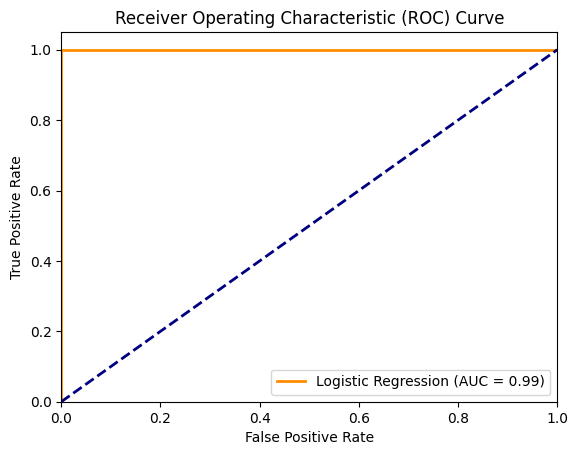

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, model_lr.predict_proba(X_test)[:, 1])
roc_auc_lr = roc_auc_score(y_test, y_pred_lr)

plt.figure()
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label='Logistic Regression (AUC = %0.2f)' % roc_auc_lr)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


**Using ANN model**

In [ ]:
import keras
from keras.models import Sequential
from keras
